<a href="https://colab.research.google.com/github/Asah-Team/machine-learning/blob/main/Asah_Capstone_Predictive_Maintenance_Copilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Dataset

In [ ]:
file_id = "15mY_Nq8YQEW8tT2q2M9GhU38UznJvzpq"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Target,2
Failure Type,6


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [ ]:
print(df['Failure Type'].value_counts())

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


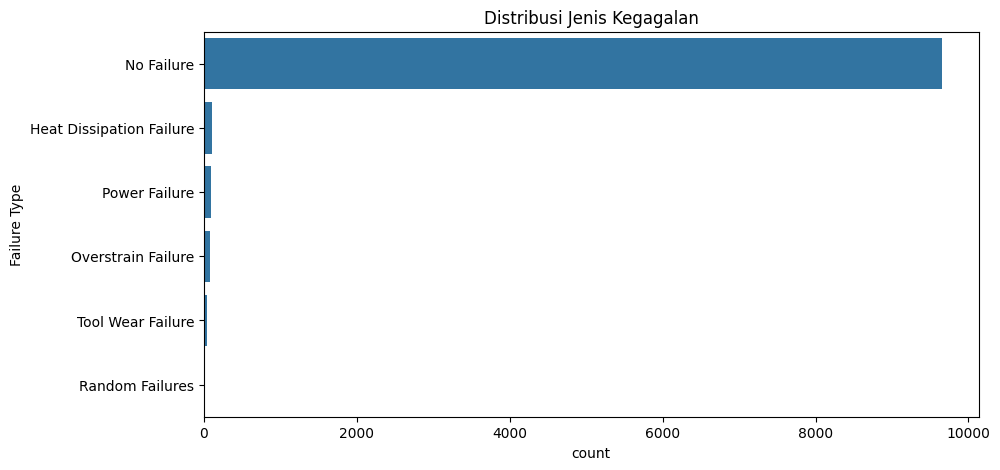

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Failure Type', data=df, order=df['Failure Type'].value_counts().index)
plt.title('Distribusi Jenis Kegagalan')
plt.show()

Histogram untuk Fitur Numerik


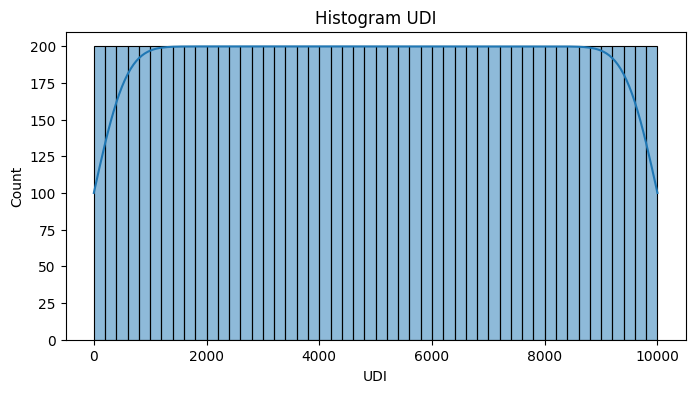

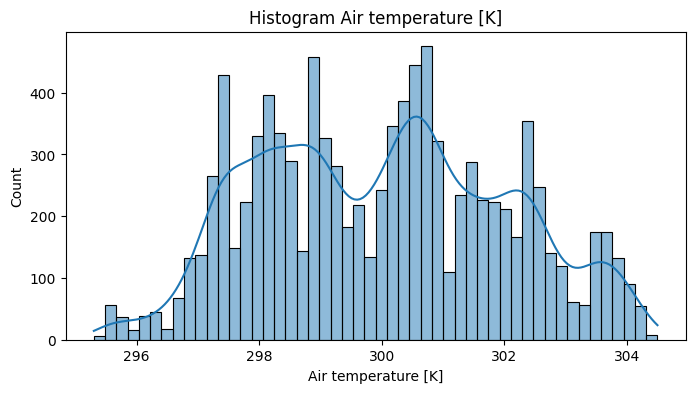

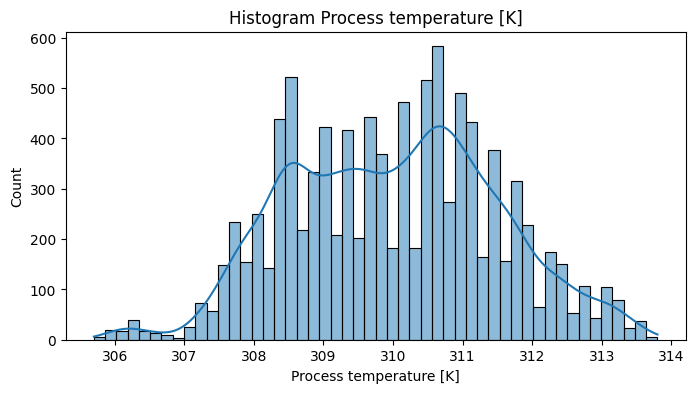

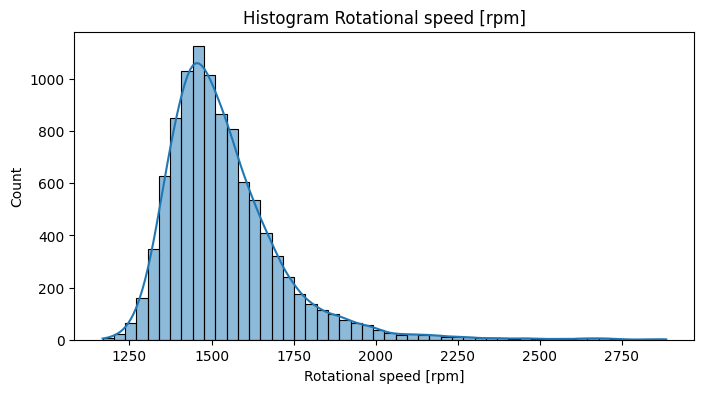

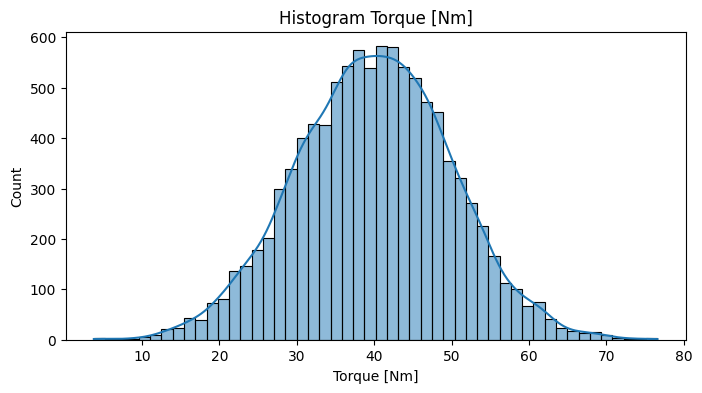

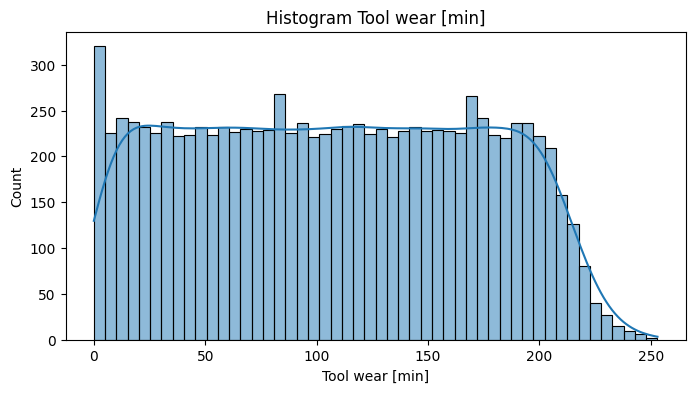

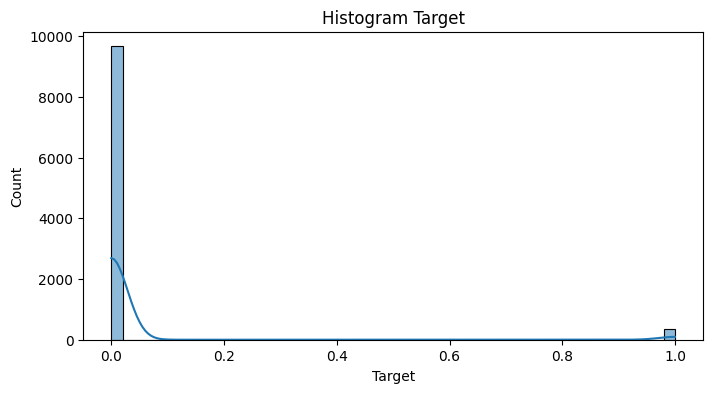

In [ ]:
num_features = df.select_dtypes(include=np.number)

print("Histogram untuk Fitur Numerik")
for col in num_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df[col], kde=True, bins=50)
  plt.title(f"Histogram {col}")
  plt.show()

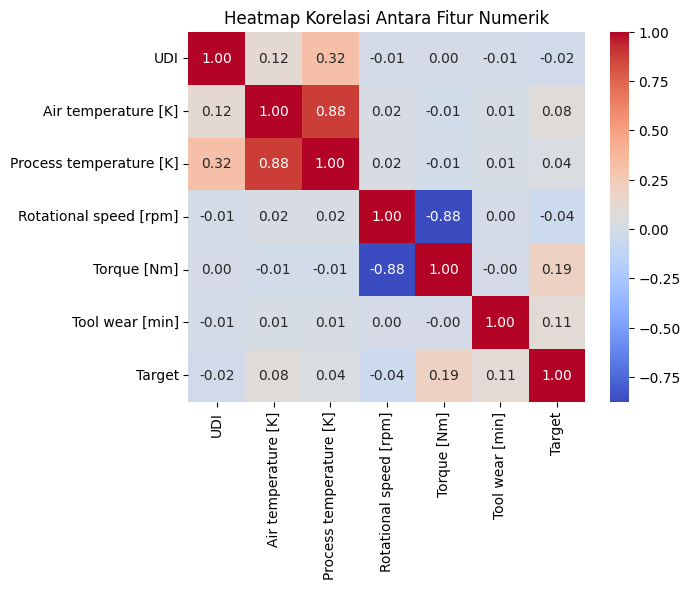

In [ ]:
corr_matrix = df[num_features.columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antara Fitur Numerik')
plt.show()

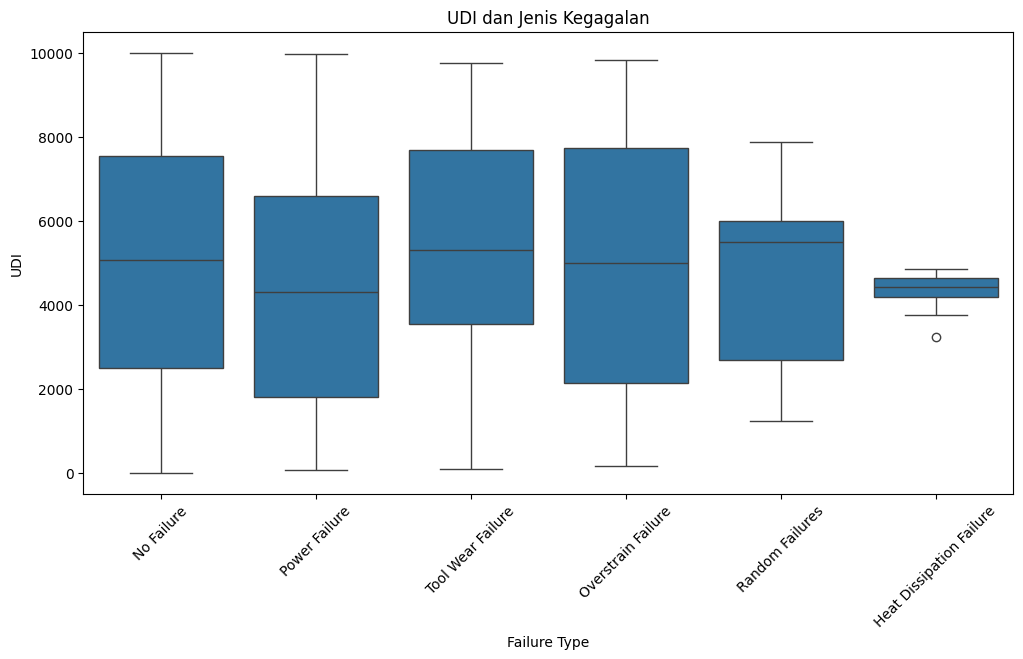

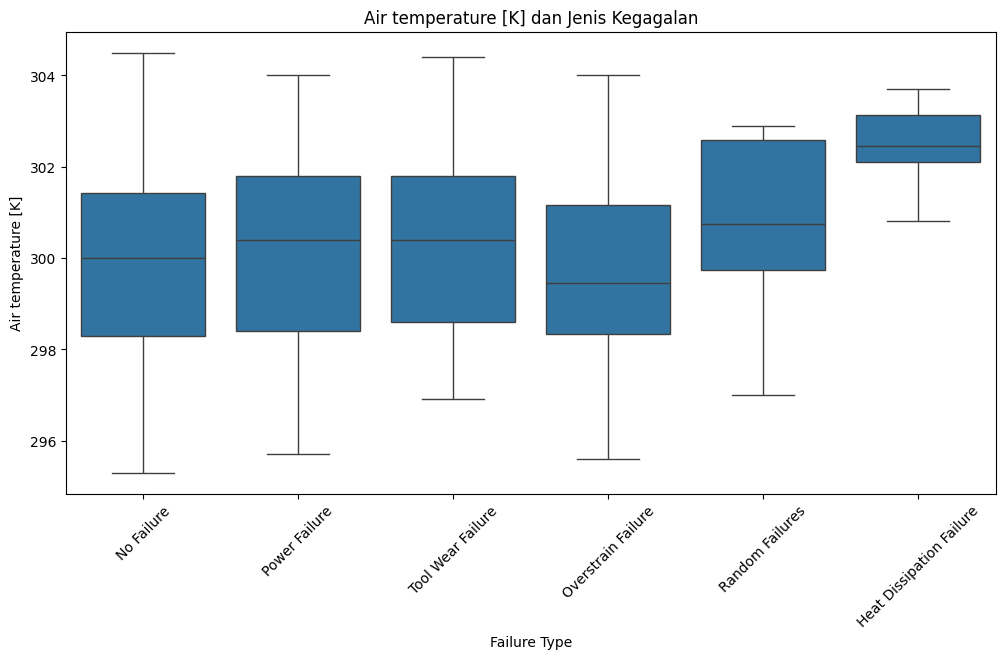

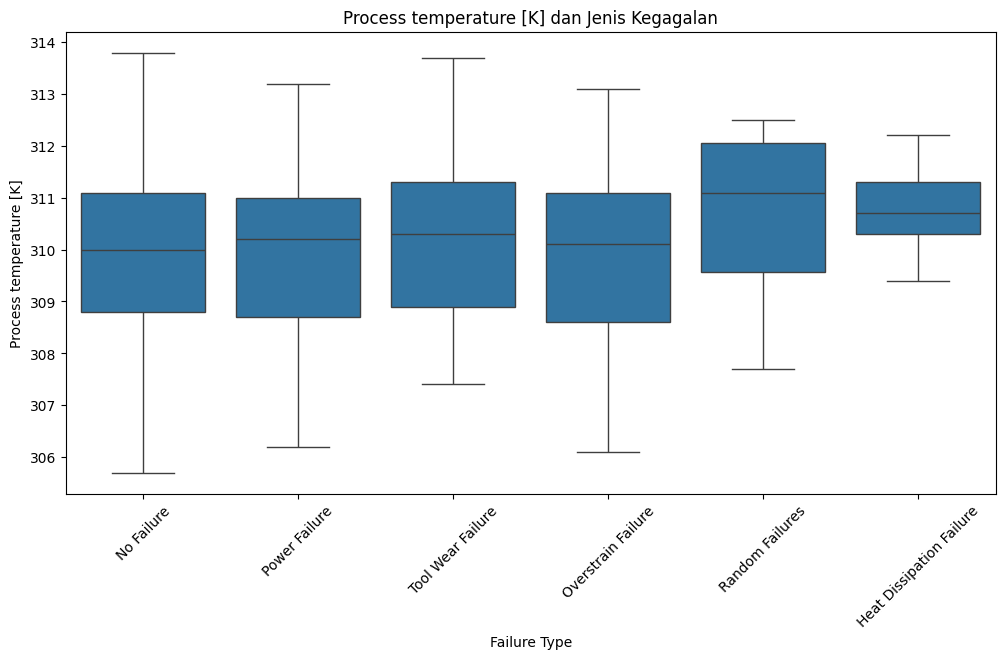

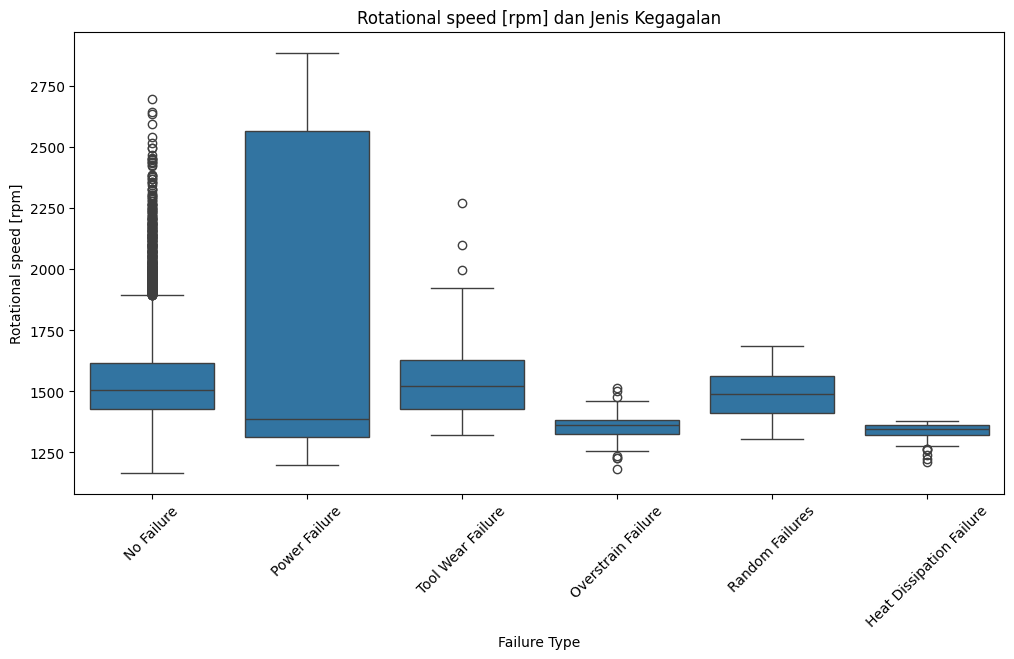

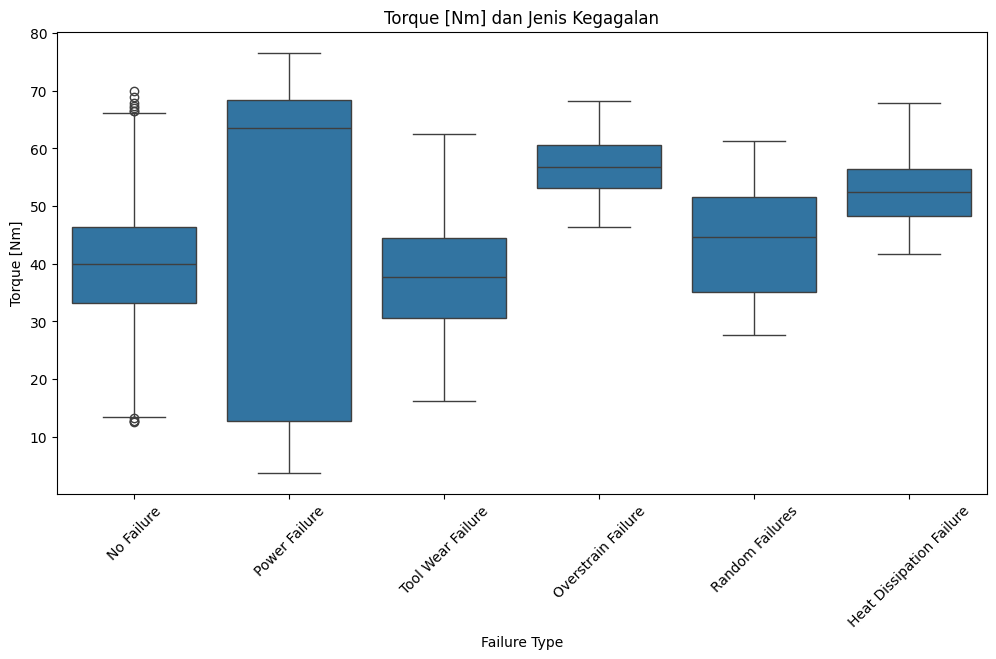

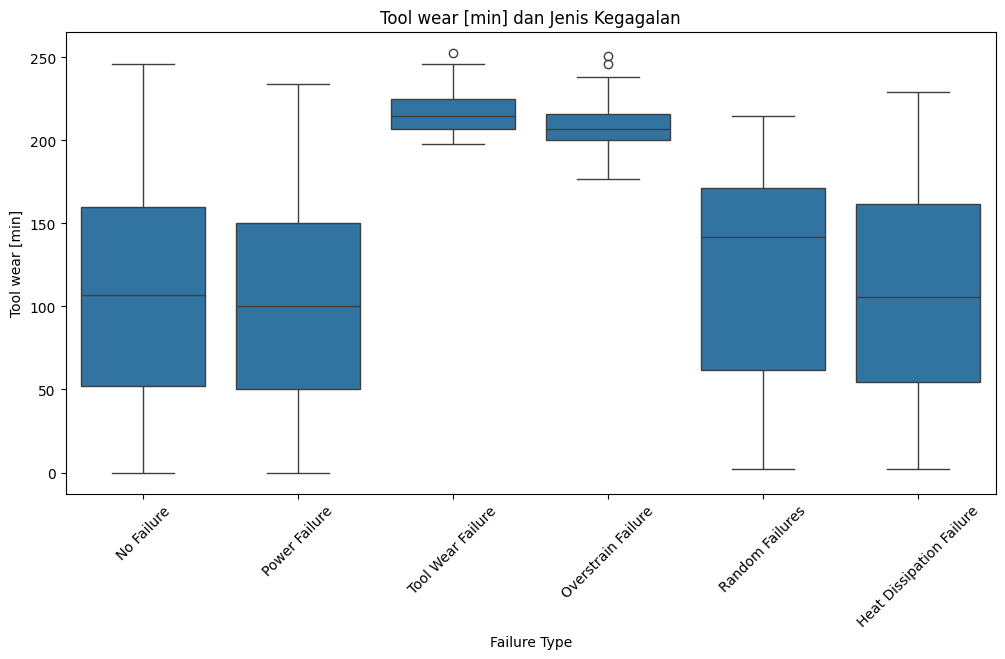

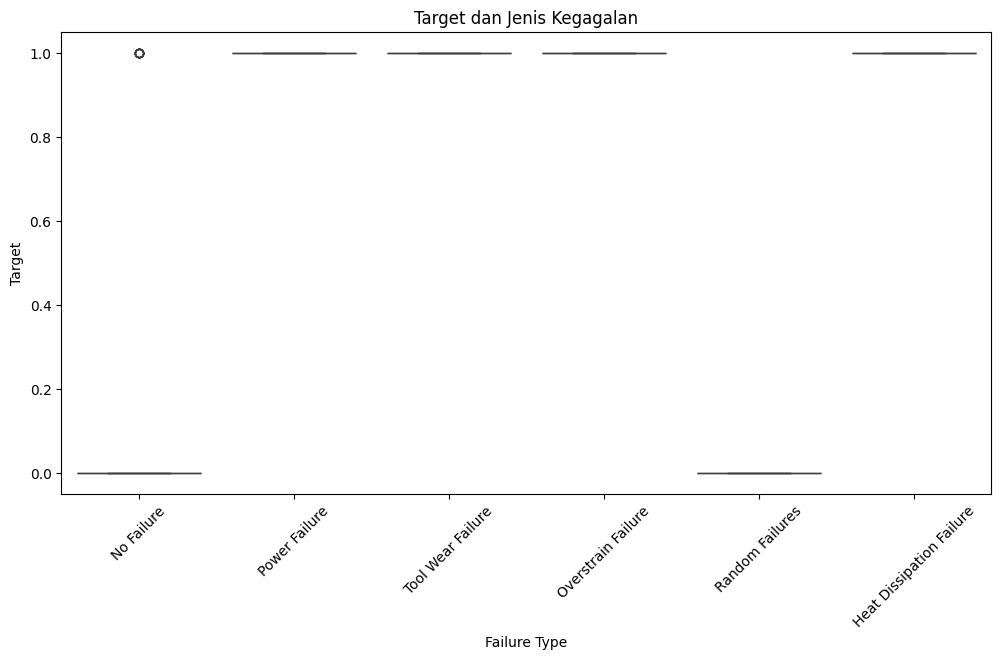

In [ ]:
for col in num_features:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='Failure Type', y=col, data=df)
  plt.title(f"{col} dan Jenis Kegagalan")
  plt.xticks(rotation=45)
  plt.show()

# Preprocessing & Pembuatan Model

Model 1 (Anomaly Detection/Multiclass Classification)  
Model 2 (Time Series)

## Preprocessing Model 1 (Anomaly Detection/Multiclass Classification)

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df_model1 = df.copy()

In [ ]:
df_model1 = df_model1.drop(columns=['UDI', 'Product ID', 'Target'])

df_model1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [ ]:
X_model1 = df_model1.drop(columns=['Failure Type'])
y_model1 = df['Failure Type']

In [ ]:
X_model1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [ ]:
y_model1

,Failure Type
0,No Failure
1,No Failure
2,No Failure
3,No Failure
4,No Failure
...,...
9995,No Failure
9996,No Failure
9997,No Failure
9998,No Failure


In [ ]:
numerical_col = X_model1.select_dtypes(include=['int64', 'float64'])

le = LabelEncoder()

X_model1['Type'] = le.fit_transform(X_model1['Type'])

In [ ]:
X_model1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [ ]:
y_model1 = le.fit_transform(y_model1)

In [ ]:
y_model1

array([1, 1, 1, ..., 1, 1, 1])

## Baseline Model 1

In [ ]:
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(X_model1, y_model1, test_size=0.2, random_state=42,stratify=y_model1)

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_model1, y_train_model1)
y_pred_rf = rf.predict(X_test_model1)

In [ ]:
print("=== Random Forest ===")
print(classification_report(y_test_model1, y_pred_rf, target_names=le.classes_))

=== Random Forest ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.82      0.90        22
              No Failure       0.98      1.00      0.99      1930
      Overstrain Failure       1.00      0.50      0.67        16
           Power Failure       0.89      0.42      0.57        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.98      2000
               macro avg       0.65      0.46      0.52      2000
            weighted avg       0.97      0.98      0.98      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
balanced_accuracy_score(y_test_model1, y_pred_rf)

np.float64(0.4564527191742899)

<Axes: >

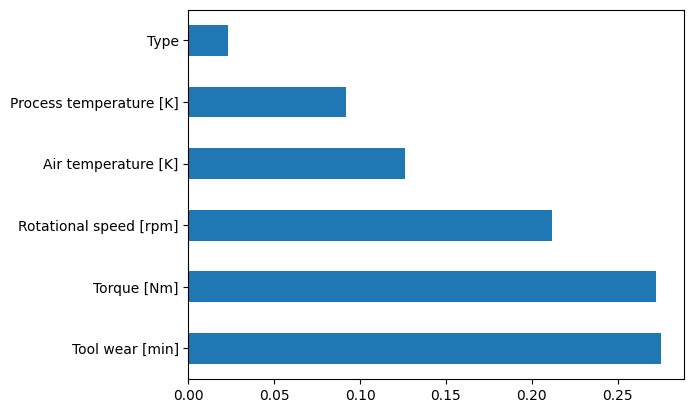

In [ ]:
feat_importance = pd.Series(rf.feature_importances_, index=X_train_model1.columns)
feat_importance.nlargest(10).plot(kind='barh')

## Applying SMOTE to balance the inbalance data

In [ ]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_model1, y_train_model1)

print(f'Original training set shape: {X_train_model1.shape, y_train_model1.shape}')
print(f'Resampled training set shape: {X_train_res.shape, y_train_res.shape}')
print('Class distribution after SMOTE:')
from collections import Counter
print(Counter(y_train_res))

Original training set shape: ((8000, 6), (8000,))
Resampled training set shape: ((46332, 6), (46332,))
Class distribution after SMOTE:
Counter({np.int64(1): 7722, np.int64(5): 7722, np.int64(4): 7722, np.int64(3): 7722, np.int64(0): 7722, np.int64(2): 7722})


In [ ]:
# Retrain Random Forest with resampled data
rf_resampled = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_resampled.fit(X_train_res, y_train_res)
y_pred_rf_resampled = rf_resampled.predict(X_test_model1)

In [ ]:
print("=== Random Forest with SMOTE ===")
print(classification_report(y_test_model1, y_pred_rf_resampled, target_names=le.classes_, labels=np.arange(len(le.classes_))))
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test_model1, y_pred_rf_resampled)}')


=== Random Forest with SMOTE ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.75      0.95      0.84        22
              No Failure       0.99      0.97      0.98      1930
      Overstrain Failure       0.79      0.94      0.86        16
           Power Failure       0.83      0.79      0.81        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.97      2000
               macro avg       0.56      0.61      0.58      2000
            weighted avg       0.98      0.97      0.97      2000

Balanced Accuracy Score: 0.6092687338341142


## XGBoost Model

In [ ]:
import xgboost as xgb

X_train_res.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_res.columns]
X_test_model1.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_model1.columns]

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:28:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_model1)

In [ ]:
print("=== XGBoost Model with SMOTE ===")
print(classification_report(y_test_model1, y_pred_xgb, target_names=le.classes_, labels=np.arange(len(le.classes_))))
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test_model1, y_pred_xgb)}')


=== XGBoost Model with SMOTE ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.92      1.00      0.96        22
              No Failure       0.99      0.97      0.98      1930
      Overstrain Failure       0.75      0.94      0.83        16
           Power Failure       0.73      0.84      0.78        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.96      2000
               macro avg       0.56      0.63      0.59      2000
            weighted avg       0.98      0.96      0.97      2000

Balanced Accuracy Score: 0.625184642305245


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'lambda': [0.01, 0.1, 1],
    'alpha': [0.01, 0.1, 1]
}

xgb_tuned = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)


random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    n_iter=50,
    scoring='balanced_accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_res, y_train_res)

print("Best parameters found: ", random_search.best_params_)
print("Best balanced accuracy score found: ", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:38:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:  {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'lambda': 0.01, 'gamma': 0, 'colsample_bytree': 0.6, 'alpha': 0.01}
Best balanced accuracy score found:  0.9943667443667444


In [ ]:

xgb_optimal = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    use_label_encoder=False, # Suppress warning
    random_state=42,
    **random_search.best_params_ # Unpack best parameters
)

xgb_optimal.fit(X_train_res, y_train_res)

y_pred_xgb_optimal = xgb_optimal.predict(X_test_model1)

print("=== Optimized XGBoost Model with SMOTE ===")
print(classification_report(y_test_model1, y_pred_xgb_optimal, target_names=le.classes_, labels=np.arange(len(le.classes_))))
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test_model1, y_pred_xgb_optimal)}')


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:38:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Optimized XGBoost Model with SMOTE ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.95      0.95      0.95        22
              No Failure       0.99      0.98      0.98      1930
      Overstrain Failure       0.88      0.88      0.88        16
           Power Failure       0.75      0.79      0.77        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.97      2000
               macro avg       0.59      0.60      0.60      2000
            weighted avg       0.98      0.97      0.97      2000

Balanced Accuracy Score: 0.5997156250258241


# **Binary Classification dan Multiclass Classification**

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Membuat Model Binary Classification

# Pisahkan Target (y) dan Fitur (X)

In [ ]:
y_binary = df['Target']

X_binary = df.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type', 'Type'])

In [ ]:
X_binary

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [ ]:
print(y_binary.value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


# Pisahkan Data Train dan Test

In [ ]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary,
    y_binary,
    test_size= 0.2,
    random_state= 42,
    stratify = y_binary
)

# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X_train_numerical = X_train_binary[numerical_cols]

scaler_anomaly = StandardScaler()
scaler_anomaly.fit(X_train_numerical)

X_train_processed = scaler_anomaly.transform(X_train_numerical)
X_test_processed = scaler_anomaly.transform(X_test_binary[numerical_cols])

joblib.dump(scaler_anomaly, 'scaler_anomaly.pkl')

['scaler_anomaly.pkl']

In [ ]:
feature_names = numerical_cols

X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train_binary.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test_binary.index)

display(X_train_processed.head())
display(X_test_processed.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4058,0.998914,0.604282,-0.460607,0.718305,-0.843997
1221,-1.505194,-1.153260,-0.775574,0.638456,0.382263
6895,0.498092,1.077466,-1.007654,0.558607,0.460870
9863,-0.553633,-0.139294,-0.709265,1.626586,-0.372359
8711,-1.455112,-1.018064,1.070019,-1.128202,-0.906882


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
2997,0.247681,-0.139294,-1.073963,2.265378,0.712410
4871,1.850310,1.618248,-0.145641,0.009646,0.429427
3858,1.249324,0.942270,0.108543,-0.239882,1.592802
951,-2.206344,-2.505215,-0.167744,-0.419543,-0.749670
6463,0.247681,-0.004098,-1.002129,2.035812,-0.089376


In [ ]:
X_train_processed

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4058,0.998914,0.604282,-0.460607,0.718305,-0.843997
1221,-1.505194,-1.153260,-0.775574,0.638456,0.382263
6895,0.498092,1.077466,-1.007654,0.558607,0.460870
9863,-0.553633,-0.139294,-0.709265,1.626586,-0.372359
8711,-1.455112,-1.018064,1.070019,-1.128202,-0.906882
...,...,...,...,...,...
980,-1.955933,-2.234824,-0.720317,0.279136,0.413706
4266,1.349489,0.739477,-0.549019,-0.050241,0.602361
7772,0.147517,1.009868,-0.416402,0.099476,-1.237029
5780,0.848667,0.807075,-0.123538,0.239211,0.083559


# Menggunakan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print("Distribusi y_train_binary sebelum SMOTE:")
print(y_train_binary.value_counts(normalize=True))

Distribusi y_train_binary sebelum SMOTE:
Target
0    0.966125
1    0.033875
Name: proportion, dtype: float64


In [ ]:
smote = SMOTE(random_state=42)

X_train_resampled_binary, y_train_resampled_binary = smote.fit_resample(X_train_processed, y_train_binary)

In [ ]:
print("\nDistribusi y_train_resampled_binary setelah SMOTE:")
print(y_train_resampled_binary.value_counts(normalize=True))


Distribusi y_train_resampled_binary setelah SMOTE:
Target
0    0.5
1    0.5
Name: proportion, dtype: float64


# Pelatihan Model

In [ ]:
import xgboost as xgb

X_train_resampled_binary.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_resampled_binary.columns]
X_test_processed.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_processed.columns]

model_binary_smote = xgb.XGBClassifier(
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)

model_binary_smote.fit(X_train_resampled_binary, y_train_resampled_binary)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:50:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Evaluasi Model


--- Classification Report (Model Binary) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.58      0.79      0.67        68

    accuracy                           0.97      2000
   macro avg       0.79      0.89      0.83      2000
weighted avg       0.98      0.97      0.98      2000


--- Confusion Matrix (Model Binary) ---


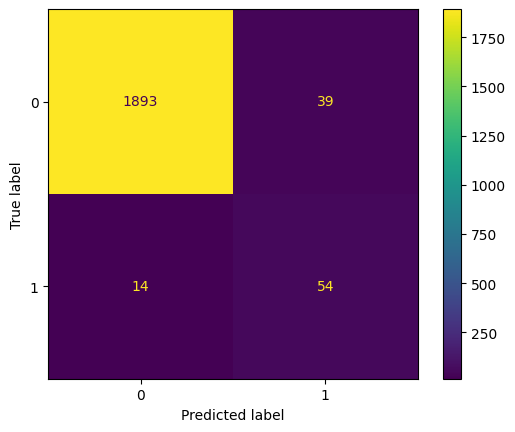

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred_binary = model_binary_smote.predict(X_test_processed)

print("\n--- Classification Report (Model Binary) ---")
print(classification_report(y_test_binary, y_pred_binary))

print("\n--- Confusion Matrix (Model Binary) ---")
cm = confusion_matrix(y_test_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import joblib

joblib.dump(model_binary_smote, 'model_binary_smote.pkl')

['model_binary_smote.pkl']

# Menggunakan scale_post_weight untuk Meningkatkan Metrik Recall

In [ ]:
ratio = y_train_binary.value_counts()[0] / y_train_binary.value_counts()[1]
print(f"Rasio No Failure / Failure adalah: {ratio:.2f}")

Rasio No Failure / Failure adalah: 28.52


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

model_binary = xgb.XGBClassifier(
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)

X_train_processed_cleaned = X_train_processed.copy()
X_train_processed_cleaned.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_processed_cleaned.columns]

ratio = y_train_binary.value_counts()[0] / y_train_binary.value_counts()[1]
print(f"Rasio No Failure / Failure adalah: {ratio:.2f}")

param_grid_scaled = {
    'scale_pos_weight': [ratio],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200]
}

grid_search_scaled = GridSearchCV(
    estimator=model_binary,
    param_grid=param_grid_scaled,
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_scaled.fit(X_train_processed_cleaned, y_train_binary)
print(grid_search_scaled.best_params_)

Rasio No Failure / Failure adalah: 28.52
Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': np.float64(28.52029520295203)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:11:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
binary_model_scaled = grid_search_scaled.best_estimator_

X_test_processed.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_processed.columns]

y_pred_scaled_binary = binary_model_scaled.predict(X_test_processed)


--- Classification Report (Model Binary) ---
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1932
           1       0.23      0.93      0.37        68

    accuracy                           0.89      2000
   macro avg       0.61      0.91      0.66      2000
weighted avg       0.97      0.89      0.92      2000


--- Confusion Matrix (Model Binary) ---


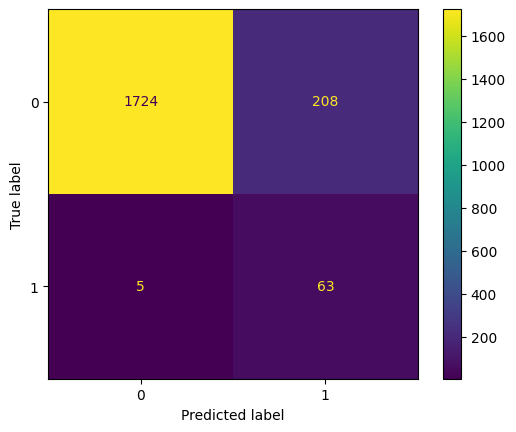

In [ ]:
print("\n--- Classification Report (Model Binary) ---")
print(classification_report(y_test_binary, y_pred_scaled_binary))

print("\n--- Confusion Matrix (Model Binary) ---")
cm = confusion_matrix(y_test_binary, y_pred_scaled_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import joblib

joblib.dump(binary_model_scaled, 'model_binary_scaled.pkl')

['model_binary_scaled.pkl']

# Membuat Model Multiclass Classification

In [ ]:
df_failures = df[df['Failure Type'] != 'No Failure'].copy()

In [ ]:
display(df_failures.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure


In [ ]:
df_failures.shape

(348, 10)

In [ ]:
df_failures['Failure Type'].value_counts()

,count
Failure Type,
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


# Pisahkan Target (y) dan Fitur (X)

In [ ]:
X_multi = df_failures.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type', 'Type'])

y_multi_labels = df_failures['Failure Type']

# Encoding Target (y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize le_multi (specific for multiclass) and fit it here
le_multi = LabelEncoder()
y_multi = le_multi.fit_transform(y_multi_labels)

In [ ]:
import joblib
joblib.dump(le_multi, 'label_encoder_multi.pkl')

['label_encoder_multi.pkl']

In [ ]:
for i, class_name in enumerate(le_multi.classes_):
    print(f"{i} -> {class_name}")

0 -> Heat Dissipation Failure
1 -> Overstrain Failure
2 -> Power Failure
3 -> Random Failures
4 -> Tool Wear Failure


# Pisahkan Data Train dan Test

In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi,
    test_size=0.2,
    random_state=42,
    stratify=y_multi
)

In [ ]:
print(f"\nUkuran X_train_multi: {X_train_multi.shape}")
print(f"Ukuran X_test_multi: {X_test_multi.shape}")


Ukuran X_train_multi: (278, 5)
Ukuran X_test_multi: (70, 5)


# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X_train_numerical = X_train_multi[numerical_cols]
X_test_numerical = X_test_multi[numerical_cols]

scaler_anomaly = StandardScaler()
scaler_anomaly.fit(X_train_numerical)

X_train_multi_processed = scaler_anomaly.transform(X_train_numerical)
X_test_multi_processed = scaler_anomaly.transform(X_test_numerical)

In [ ]:
X_train_multi_processed = pd.DataFrame(X_train_multi_processed, columns=numerical_cols, index=X_train_multi.index)
X_test_multi_processed = pd.DataFrame(X_test_multi_processed, columns=numerical_cols, index=X_test_multi.index)

display(X_train_multi_processed.head())
display(X_test_multi_processed.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4727,1.263885,1.132900,-0.414534,-0.174918,0.893953
2233,-0.660970,-1.157886,2.723242,-2.250401,0.457213
7083,-0.068707,0.098351,-0.219722,0.728527,0.879865
4840,1.263885,1.206796,-0.526227,0.856718,-1.233391
9764,-1.154522,-0.566716,-0.536617,1.027640,-1.895545


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4831,1.313240,1.280692,-0.349597,0.282909,-1.641954
7280,-0.463549,-0.049441,-0.552202,1.204667,-1.191126
2444,-0.809036,-1.231782,-0.606749,1.119206,-0.993889
3019,-0.167417,-0.345027,-0.315830,0.264595,0.851688
4211,0.622267,0.320040,-0.484667,0.179134,-1.951899


In [ ]:
import joblib

joblib.dump(preprocessor_multi, 'preprocessor_anomaly.pkl', protocol=4)

['preprocessor_anomaly.pkl']

In [ ]:
scaler_anomaly = StandardScaler()

joblib.dump(scaler_anomaly, 'scaler_anomaly.pkl')

['scaler_anomaly.pkl']

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print("\nDistribusi y_train_multi sebelum SMOTE:")
print(pd.Series(y_train_multi).value_counts())

smote_multi = SMOTE(random_state=42)
X_train_multi_resampled, y_train_multi_resampled = smote_multi.fit_resample(
    X_train_multi_processed, y_train_multi
)

print(pd.Series(y_train_multi_resampled).value_counts())


Distribusi y_train_multi sebelum SMOTE:
0    90
2    76
1    62
4    36
3    14
Name: count, dtype: int64
0    90
2    90
4    90
1    90
3    90
Name: count, dtype: int64


# Pelatihan Model

In [ ]:
import xgboost as xgb

X_train_multi_resampled.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_multi_resampled.columns]

model_multi = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

model_multi.fit(X_train_multi_resampled, y_train_multi_resampled)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:00:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5, ...)

# Evaluasi Model


--- Classification Report (Model Multiclass - Diagnostik) ---
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.92      1.00      0.96        22
      Overstrain Failure       0.92      0.69      0.79        16
           Power Failure       0.86      1.00      0.93        19
         Random Failures       0.75      0.75      0.75         4
       Tool Wear Failure       0.88      0.78      0.82         9

                accuracy                           0.89        70
               macro avg       0.86      0.84      0.85        70
            weighted avg       0.89      0.89      0.88        70


--- Confusion Matrix (Model Multiclass - Diagnostik) ---


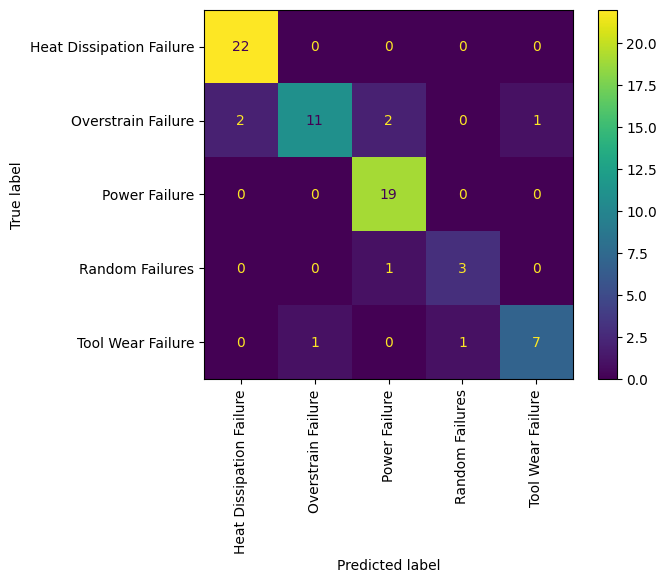

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_test_multi_processed.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_multi_processed.columns]

y_pred_multi = model_multi.predict(X_test_multi_processed)

print("\n--- Classification Report (Model Multiclass - Diagnostik) ---")
print(classification_report(y_test_multi, y_pred_multi, target_names=le_multi.classes_))

print("\n--- Confusion Matrix (Model Multiclass - Diagnostik) ---")
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=le_multi.classes_)
disp_multi.plot(xticks_rotation='vertical')
plt.show()

In [ ]:
import joblib

joblib.dump(model_multi, 'model_multi.pkl')

['model_multi.pkl']

# Pipeline Anomaly Detection (Binary + Multiclass)

In [ ]:
import joblib
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

try:
    # Load the best binary model (from GridSearchCV with scale_pos_weight)
    model_binary = joblib.load('/content/model_binary_smote.pkl')
    # Ensure consistent preprocessor name
    preprocessor_binary = joblib.load('/content/preprocessor_binary_model.pkl')

    model_multi = joblib.load('/content/model_multi.pkl')
    preprocessor_multi = joblib.load('/content/preprocessor_multi_model.pkl')
    le_multi = joblib.load('/content/label_encoder_multi.pkl')

    print("✅ Semua 5 aset (2 model, 2 preprocessor, 1 encoder) berhasil dimuat.")

except FileNotFoundError:
    print("❌ ERROR: Pastikan semua 5 file .pkl Anda ada di direktori yang sama!")
    raise

✅ Semua 5 aset (2 model, 2 preprocessor, 1 encoder) berhasil dimuat.


In [ ]:
def predict_status(X_new_raw):
    """
    Menjalankan pipeline prediksi 2-tahap lengkap.

    Input:
    - X_new_raw: Sebuah DataFrame (bisa 1 baris atau lebih)
                 yang berisi data MENTAH, *sebelum* di-drop kolom
                 Target/Failure Type.
    """

    # 1. Binary Classification (Anomaly Detection)
    data_binary_processed_array = preprocessor_binary.transform(X_new_raw)

    # Get feature names from the preprocessor and clean them for XGBoost
    binary_feature_names_original = numerical_cols
    binary_feature_names_cleaned = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in binary_feature_names_original]

    # Convert processed array to DataFrame with cleaned column names
    data_binary_processed_df = pd.DataFrame(data_binary_processed_array, columns=binary_feature_names_cleaned)

    pred_binary = model_binary.predict(data_binary_processed_df)

    hasil_prediksi = []

    for i, prediksi_awal in enumerate(pred_binary):
        if prediksi_awal == 0:
            hasil_prediksi.append("No Failure")
        else:
            # 2. Multiclass Classification (Failure Type Diagnosis)
            baris_data_raw = X_new_raw.iloc[i:i+1]
            data_multi_processed_array = preprocessor_multi.transform(baris_data_raw)

            # Get cleaned feature names for multiclass preprocessor (already defined as cleaned_feature_names)
            multi_feature_names_original = numerical_cols
            multi_feature_names_cleaned = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in multi_feature_names_original]

            data_multi_processed_df = pd.DataFrame(data_multi_processed_array, columns=multi_feature_names_cleaned)

            pred_multi_numeric = model_multi.predict(data_multi_processed_df)[0]
            pred_multi_label = le_multi.inverse_transform([pred_multi_numeric])[0]
            hasil_prediksi.append(pred_multi_label)

    return hasil_prediksi[0] if len(hasil_prediksi) == 1 else hasil_prediksi

In [ ]:
file_id = "15mY_Nq8YQEW8tT2q2M9GhU38UznJvzpq"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)

X_raw = df.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type', 'Type'])
y_raw = df['Failure Type']


data_normal_raw = X_raw.iloc[10:11]
label_asli_normal = y_raw.iloc[10]

print(f"Menguji data Normal (Label Asli: {label_asli_normal})")
hasil_1 = predict_status(data_normal_raw)
print(f"Hasil Prediksi Pipeline: {hasil_1}")
print("-" * 30)


index_failure = y_raw[y_raw != 'No Failure'].index[0]

data_failure_raw = X_raw.iloc[index_failure : index_failure + 1]
label_asli_failure = y_raw.iloc[index_failure]

print(f"Menguji data Failure (Label Asli: {label_asli_failure})")
hasil_2 = predict_status(data_failure_raw)
print(f"Hasil Prediksi Pipeline: {hasil_2}")
print("-" * 30)

Menguji data Normal (Label Asli: No Failure)
Hasil Prediksi Pipeline: No Failure
------------------------------
Menguji data Failure (Label Asli: Power Failure)
Hasil Prediksi Pipeline: Power Failure
------------------------------


In [ ]:
# Ambil 10 sampel acak dari DataFrame asli
random_sample_df = df.sample(n=10, random_state=42)

# Pisahkan fitur (X) dan target (y) dari sampel acak
X_random_sample = random_sample_df.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type'])
y_random_sample = random_sample_df['Failure Type']

print("--- Melakukan 10 Uji Prediksi Acak ---")
for i in range(len(X_random_sample)):
    data_to_predict = X_random_sample.iloc[i:i+1]
    actual_failure_type = y_random_sample.iloc[i]

    predicted_status = predict_status(data_to_predict)

    print(f"\nTest {i+1}:")
    print(f"  Data Input: {data_to_predict.to_dict(orient='records')[0]}")
    print(f"  Jenis Kegagalan Asli: {actual_failure_type}")
    print(f"  Hasil Prediksi Pipeline: {predicted_status}")
    print("-------------------------------------")

--- Melakukan 10 Uji Prediksi Acak ---

Test 1:
  Data Input: {'Type': 'L', 'Air temperature [K]': 300.8, 'Process temperature [K]': 310.3, 'Rotational speed [rpm]': 1538, 'Torque [Nm]': 36.1, 'Tool wear [min]': 198}
  Jenis Kegagalan Asli: No Failure
  Hasil Prediksi Pipeline: No Failure
-------------------------------------

Test 2:
  Data Input: {'Type': 'M', 'Air temperature [K]': 303.6, 'Process temperature [K]': 311.8, 'Rotational speed [rpm]': 1421, 'Torque [Nm]': 44.8, 'Tool wear [min]': 101}
  Jenis Kegagalan Asli: No Failure
  Hasil Prediksi Pipeline: Random Failures
-------------------------------------

Test 3:
  Data Input: {'Type': 'M', 'Air temperature [K]': 298.3, 'Process temperature [K]': 307.9, 'Rotational speed [rpm]': 1485, 'Torque [Nm]': 42.0, 'Tool wear [min]': 117}
  Jenis Kegagalan Asli: No Failure
  Hasil Prediksi Pipeline: No Failure
-------------------------------------

Test 4:
  Data Input: {'Type': 'L', 'Air temperature [K]': 303.3, 'Process temperature [

# Time Series Model

## Preprocessing

In [ ]:
df_model2 = df.copy()

df_model2 = df_model2.sort_values(by='UDI')

display(df_model2.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df_model2['time'] = pd.date_range(start='2025-01-01', periods=len(df_model2), freq='h')

df_model2['hour'] = df_model2['time'].dt.hour
df_model2['dayofweek'] = df_model2['time'].dt.dayofweek
df_model2['dayofyear'] = df_model2['time'].dt.dayofyear
df_model2['month'] = df_model2['time'].dt.month

display(df_model2[['time', 'hour', 'dayofweek', 'dayofyear', 'month']].head())

,time,hour,dayofweek,dayofyear,month
0,2025-01-01 00:00:00,0,2,1,1
1,2025-01-01 01:00:00,1,2,1,1
2,2025-01-01 02:00:00,2,2,1,1
3,2025-01-01 03:00:00,3,2,1,1
4,2025-01-01 04:00:00,4,2,1,1


In [ ]:
y_model2 = df_model2[['hour', 'dayofweek', 'dayofyear', 'month']]

X_model2 = df_model2.drop(columns=['Target', 'Failure Type', 'time', 'UDI', 'Product ID', 'Type', 'hour', 'dayofweek', 'dayofyear', 'month'])

display(X_model2.head())
print("\nFirst 5 values of y_model2:")
display(y_model2.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9



First 5 values of y_model2:


,hour,dayofweek,dayofyear,month
0,0,2,1,1
1,1,2,1,1
2,2,2,1,1
3,3,2,1,1
4,4,2,1,1


In [ ]:
scaler = MinMaxScaler()
X_model2_scaled = scaler.fit_transform(X_model2)
X_model2_scaled = pd.DataFrame(X_model2_scaled, columns=X_model2.columns)

display(X_model2_scaled.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573


In [ ]:
window_size = 32

X_lstm, y_lstm = [], []

for i in range(len(X_model2_scaled) - window_size):
    X_lstm.append(X_model2_scaled.iloc[i : i + window_size].values)
    y_lstm.append(y_model2.iloc[i + window_size].values)

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

print(f"Shape of X_lstm (samples, timesteps, features): {X_lstm.shape}")
print(f"Shape of y_lstm (samples, target_features): {y_lstm.shape}")
print("\nFirst 2 samples of X_lstm:")
print(X_lstm[:2])
print("\nFirst 2 samples of y_lstm:")
print(y_lstm[:2])

Shape of X_lstm (samples, timesteps, features): (9968, 32, 5)
Shape of y_lstm (samples, target_features): (9968, 4)

First 2 samples of X_lstm:
[[[0.30434783 0.35802469 0.22293364 0.53571429 0.        ]
  [0.31521739 0.37037037 0.13969732 0.58379121 0.01185771]
  [0.30434783 0.34567901 0.19208382 0.62637363 0.01976285]
  [0.31521739 0.35802469 0.15424913 0.49038462 0.02766798]
  [0.31521739 0.37037037 0.13969732 0.49725275 0.03557312]
  [0.30434783 0.35802469 0.14959255 0.52335165 0.04347826]
  [0.30434783 0.35802469 0.22700815 0.53021978 0.05533597]
  [0.30434783 0.35802469 0.20896391 0.5        0.06324111]
  [0.32608696 0.37037037 0.29045402 0.34065934 0.07114625]
  [0.34782609 0.40740741 0.33352736 0.33241758 0.08300395]
  [0.33695652 0.39506173 0.35739232 0.2760989  0.09486166]
  [0.35869565 0.41975309 0.14842841 0.55631868 0.11462451]
  [0.35869565 0.41975309 0.09953434 0.64972527 0.13438735]
  [0.35869565 0.43209877 0.33410943 0.35989011 0.14624506]
  [0.35869565 0.43209877 0.504

In [ ]:
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

print(f"Shape of X_train_model2: {X_train_model2.shape}")
print(f"Shape of X_test_model2: {X_test_model2.shape}")
print(f"Shape of y_train_model2: {y_train_model2.shape}")
print(f"Shape of y_test_model2: {y_test_model2.shape}")

Shape of X_train_model2: (7974, 32, 5)
Shape of X_test_model2: (1994, 32, 5)
Shape of y_train_model2: (7974, 4)
Shape of y_test_model2: (1994, 4)


In [ ]:
model_lstm_regression = Sequential()
model_lstm_regression.add(LSTM(50, activation='relu', input_shape=(X_train_model2.shape[1], X_train_model2.shape[2])))
model_lstm_regression.add(Dropout(0.2))
model_lstm_regression.add(Dense(y_train_model2.shape[1], activation='linear'))

model_lstm_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

model_lstm_regression.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,404 (44.55 KB)

 Trainable params: 11,404 (44.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm_regression = model_lstm_regression.fit(X_train_model2, y_train_model2, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
print("LSTM regression model trained successfully.")

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 8643.7822 - mae: 43.4263 - mse: 8643.7822 - val_loss: 2212.3403 - val_mae: 21.3210 - val_mse: 2212.3403
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2524.8201 - mae: 26.7852 - mse: 2524.8201 - val_loss: 1728.3431 - val_mae: 19.1227 - val_mse: 1728.3431
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2121.1299 - mae: 22.9096 - mse: 2121.1299 - val_loss: 1649.9089 - val_mae: 18.1428 - val_mse: 1649.9089
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1908.7408 - mae: 20.3317 - mse: 1908.7408 - val_loss: 1753.1556 - val_mae: 18.8933 - val_mse: 1753.1556
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1791.9763 - mae: 18.9455 - mse: 1791.9763 - val_loss: 1765.6282 - val_mae: 17.4278 - val_mse: 1765.6282
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1902.7660 - mae: 19.0258 - mse: 1902.7660 - val_loss: 1362.8246 - val_mae: 15.1415 - val_mse: 1362.8246
Epoch 7/50
200/

In [ ]:
y_pred_lstm_regression = model_lstm_regression.predict(X_test_model2)

print('\n=== LSTM Regression Model Evaluation ===')

loss, mae, mse = model_lstm_regression.evaluate(X_test_model2, y_test_model2, verbose=0)
print(f'Overall Test Loss (MSE): {loss:.4f}')
print(f'Overall Test MAE: {mae:.4f}')

output_feature_names = ['hour', 'dayofweek', 'dayofyear', 'month']
for i, feature_name in enumerate(output_feature_names):
    feature_mae = np.mean(np.abs(y_test_model2[:, i] - y_pred_lstm_regression[:, i]))
    print(f'MAE for {feature_name}: {feature_mae:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

=== LSTM Regression Model Evaluation ===
Overall Test Loss (MSE): 1225.2163
Overall Test MAE: 12.8048
MAE for hour: 6.0122
MAE for dayofweek: 1.7438
MAE for dayofyear: 41.8073
MAE for month: 1.6557


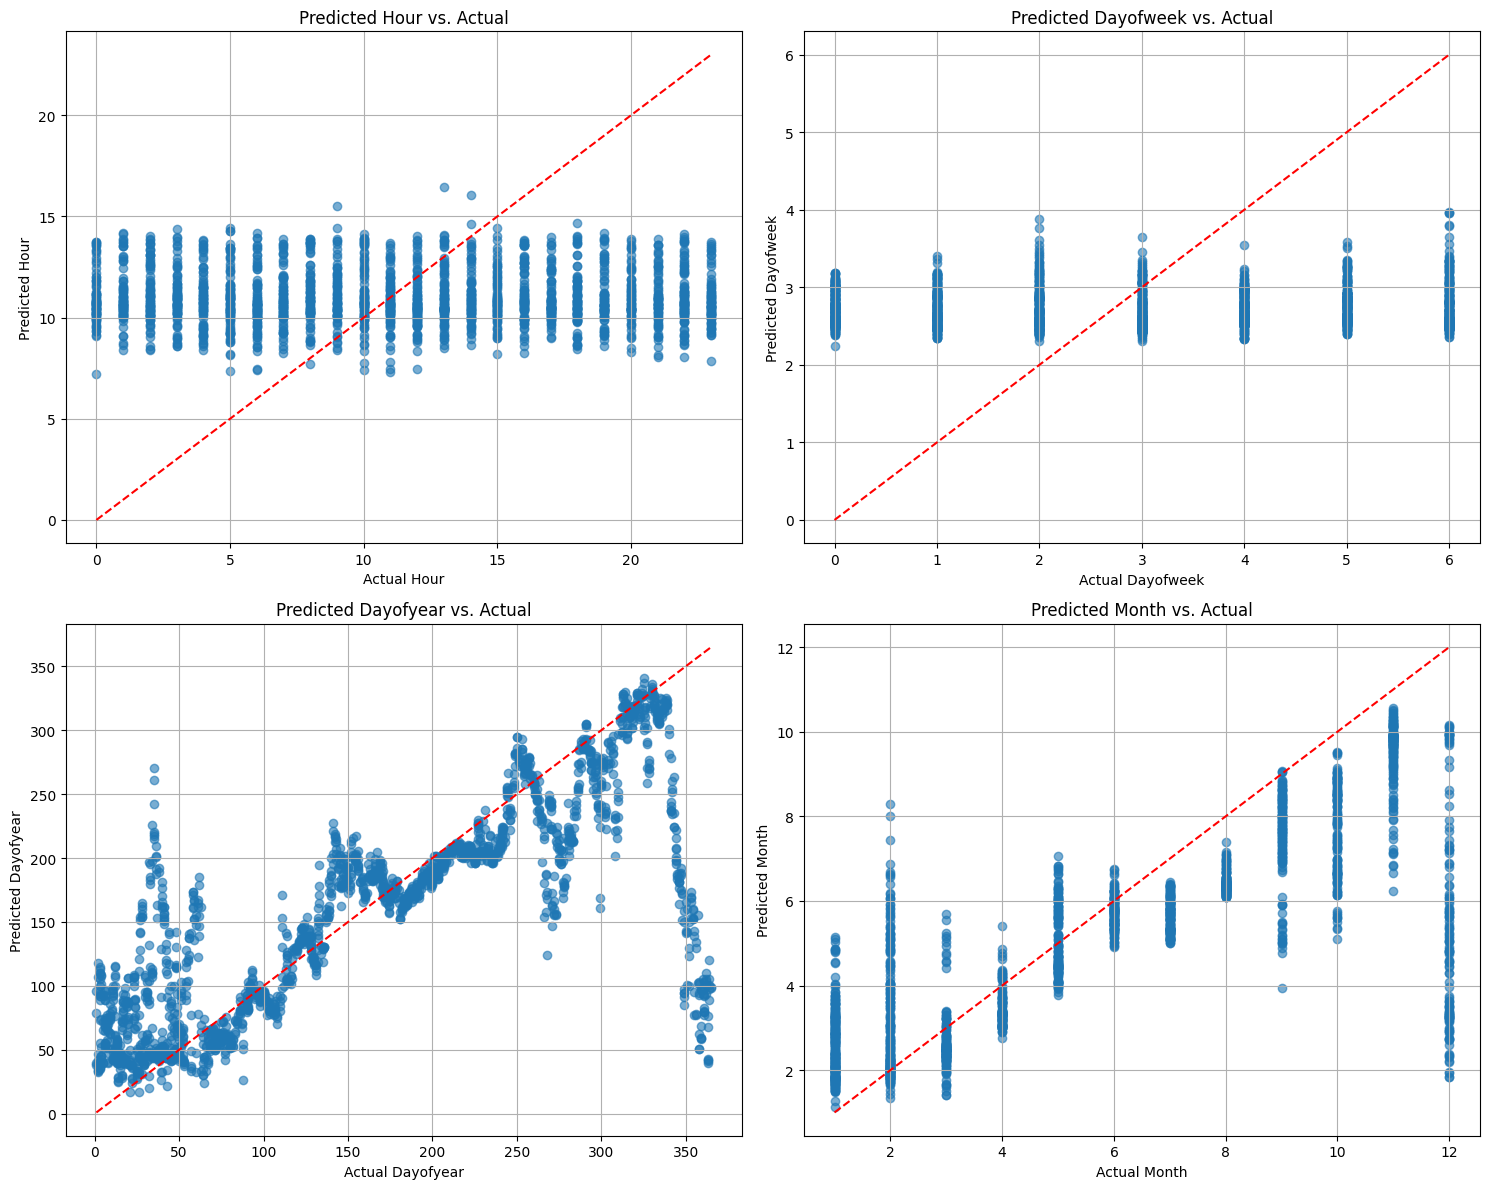

In [ ]:
import matplotlib.pyplot as plt

output_feature_names = ['hour', 'dayofweek', 'dayofyear', 'month']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature_name in enumerate(output_feature_names):
    actual_values = y_test_model2[:, i]
    predicted_values = y_pred_lstm_regression[:, i]

    ax = axes[i]
    ax.scatter(actual_values, predicted_values, alpha=0.6)
    min_val = min(actual_values.min(), predicted_values.min())
    max_val = max(actual_values.max(), predicted_values.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--') # Perfect prediction line
    ax.set_xlabel(f'Actual {feature_name.replace("_", " ").title()}')
    ax.set_ylabel(f'Predicted {feature_name.replace("_", " ").title()}')
    ax.set_title(f'Predicted {feature_name.replace("_", " ").title()} vs. Actual')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Improving LSTM

In [ ]:
df_model2['hour_sin'] = np.sin(2 * np.pi * df_model2['hour'] / 24)
df_model2['hour_cos'] = np.cos(2 * np.pi * df_model2['hour'] / 24)
df_model2['dayofweek_sin'] = np.sin(2 * np.pi * df_model2['dayofweek'] / 7)
df_model2['dayofweek_cos'] = np.cos(2 * np.pi * df_model2['dayofweek'] / 7)
df_model2['dayofyear_sin'] = np.sin(2 * np.pi * df_model2['dayofyear'] / 365)
df_model2['dayofyear_cos'] = np.cos(2 * np.pi * df_model2['dayofyear'] / 365)
df_model2['month_sin'] = np.sin(2 * np.pi * df_model2['month'] / 12)
df_model2['month_cos'] = np.cos(2 * np.pi * df_model2['month'] / 12)

# Drop original discrete time features and add new cyclical features to X_model2
X_model2 = df_model2.drop(columns=['Target', 'Failure Type', 'time', 'UDI', 'Product ID', 'Type',
                                   'hour', 'dayofweek', 'dayofyear', 'month']).copy()

# Display the head of the updated X_model2 DataFrame
display(X_model2.head())

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,dayofyear_sin,dayofyear_cos,month_sin,month_cos
0,298.1,308.6,1551,42.8,0,0.000000,1.000000,0.974928,-0.222521,0.017213,0.999852,0.5,0.866025
1,298.2,308.7,1408,46.3,3,0.258819,0.965926,0.974928,-0.222521,0.017213,0.999852,0.5,0.866025
2,298.1,308.5,1498,49.4,5,0.500000,0.866025,0.974928,-0.222521,0.017213,0.999852,0.5,0.866025
3,298.2,308.6,1433,39.5,7,0.707107,0.707107,0.974928,-0.222521,0.017213,0.999852,0.5,0.866025
4,298.2,308.7,1408,40.0,9,0.866025,0.500000,0.974928,-0.222521,0.017213,0.999852,0.5,0.866025


In [ ]:
y_model2 = df_model2[['hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']]

# Scale X_model2 (features)
scaler_X = MinMaxScaler()
X_model2_scaled = scaler_X.fit_transform(X_model2)
X_model2_scaled = pd.DataFrame(X_model2_scaled, columns=X_model2.columns)

# Scale y_model2 (target variables)
scaler_y = MinMaxScaler()
y_model2_scaled = scaler_y.fit_transform(y_model2)
y_model2_scaled = pd.DataFrame(y_model2_scaled, columns=y_model2.columns)

print("X_model2_scaled head:")
display(X_model2_scaled.head())
print("y_model2_scaled head:")
display(y_model2_scaled.head())


X_model2_scaled head:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,dayofyear_sin,dayofyear_cos,month_sin,month_cos
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.500000,1.000000,1.0,0.356896,0.508607,0.999926,0.75,0.933013
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.629410,0.982963,1.0,0.356896,0.508607,0.999926,0.75,0.933013
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.750000,0.933013,1.0,0.356896,0.508607,0.999926,0.75,0.933013
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.853553,0.853553,1.0,0.356896,0.508607,0.999926,0.75,0.933013
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.933013,0.750000,1.0,0.356896,0.508607,0.999926,0.75,0.933013


y_model2_scaled head:


,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,dayofyear_sin,dayofyear_cos,month_sin,month_cos
0,0.500000,1.000000,1.0,0.356896,0.508607,0.999926,0.75,0.933013
1,0.629410,0.982963,1.0,0.356896,0.508607,0.999926,0.75,0.933013
2,0.750000,0.933013,1.0,0.356896,0.508607,0.999926,0.75,0.933013
3,0.853553,0.853553,1.0,0.356896,0.508607,0.999926,0.75,0.933013
4,0.933013,0.750000,1.0,0.356896,0.508607,0.999926,0.75,0.933013


In [ ]:
window_size = 32

X_lstm, y_lstm = [], []

for i in range(len(X_model2_scaled) - window_size):
    X_lstm.append(X_model2_scaled.iloc[i : i + window_size].values)
    y_lstm.append(y_model2_scaled.iloc[i + window_size].values)

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

print(f"Shape of X_lstm (samples, timesteps, features): {X_lstm.shape}")
print(f"Shape of y_lstm (samples, target_features): {y_lstm.shape}")

# Re-split the data into training and testing sets
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

print(f"Shape of X_train_model2: {X_train_model2.shape}")
print(f"Shape of X_test_model2: {X_test_model2.shape}")
print(f"Shape of y_train_model2: {y_train_model2.shape}")
print(f"Shape of y_test_model2: {y_test_model2.shape}")

Shape of X_lstm (samples, timesteps, features): (9968, 32, 13)
Shape of y_lstm (samples, target_features): (9968, 8)
Shape of X_train_model2: (7974, 32, 13)
Shape of X_test_model2: (1994, 32, 13)
Shape of y_train_model2: (7974, 8)
Shape of y_test_model2: (1994, 8)


In [ ]:
model_lstm_regression_cyclical = Sequential()
model_lstm_regression_cyclical.add(LSTM(50, activation='relu', input_shape=(X_train_model2.shape[1], X_train_model2.shape[2])))
model_lstm_regression_cyclical.add(Dropout(0.2))
model_lstm_regression_cyclical.add(Dense(y_train_model2.shape[1], activation='linear'))

model_lstm_regression_cyclical.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

print("LSTM regression model architecture:")
model_lstm_regression_cyclical.summary()

history_lstm_regression_cyclical = model_lstm_regression_cyclical.fit(X_train_model2, y_train_model2, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
print("LSTM regression model with cyclical features trained successfully.")

LSTM regression model architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,208 (51.59 KB)

 Trainable params: 13,208 (51.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.1365 - mae: 0.2829 - mse: 0.1365 - val_loss: 0.0088 - val_mae: 0.0744 - val_mse: 0.0088
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mae: 0.1201 - mse: 0.0237 - val_loss: 0.0041 - val_mae: 0.0496 - val_mse: 0.0041
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176 - mae: 0.1033 - mse: 0.0176 - val_loss: 0.0044 - val_mae: 0.0516 - val_mse: 0.0044
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - mae: 0.0945 - mse: 0.0148 - val_loss: 0.0034 - val_mae: 0.0449 - val_mse: 0.0034
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - mae: 0.0898 - mse: 0.0135 - val_loss: 0.0028 - val_mae: 0.0400 - val_mse: 0.0028
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mae: 0.0877 - mse: 0.0128 - val_loss: 0.0028 - val_mae: 0.0411 - val_mse: 0.0028
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mae: 0.0857 - mse: 0.0123 - va

In [ ]:
loss_cyclical, mae_cyclical, mse_cyclical = model_lstm_regression_cyclical.evaluate(X_test_model2, y_test_model2, verbose=0)

print('\n=== LSTM Regression Model with Cyclical Features Evaluation ===')
print(f'Overall Test Loss (MSE): {loss_cyclical:.4f}')
print(f'Overall Test MAE: {mae_cyclical:.4f}')

# Inverse transform predictions for better interpretability if needed, though MAE/MSE are fine on scaled data
y_pred_lstm_regression_cyclical = model_lstm_regression_cyclical.predict(X_test_model2)

output_feature_names_cyclical = ['hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']
for i, feature_name in enumerate(output_feature_names_cyclical):
    feature_mae = np.mean(np.abs(y_test_model2[:, i] - y_pred_lstm_regression_cyclical[:, i]))
    print(f'MAE for {feature_name}: {feature_mae:.4f}')


=== LSTM Regression Model with Cyclical Features Evaluation ===
Overall Test Loss (MSE): 0.0018
Overall Test MAE: 0.0330
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
MAE for hour_sin: 0.0298
MAE for hour_cos: 0.0302
MAE for dayofweek_sin: 0.0446
MAE for dayofweek_cos: 0.0442
MAE for dayofyear_sin: 0.0298
MAE for dayofyear_cos: 0.0271
MAE for month_sin: 0.0301
MAE for month_cos: 0.0279


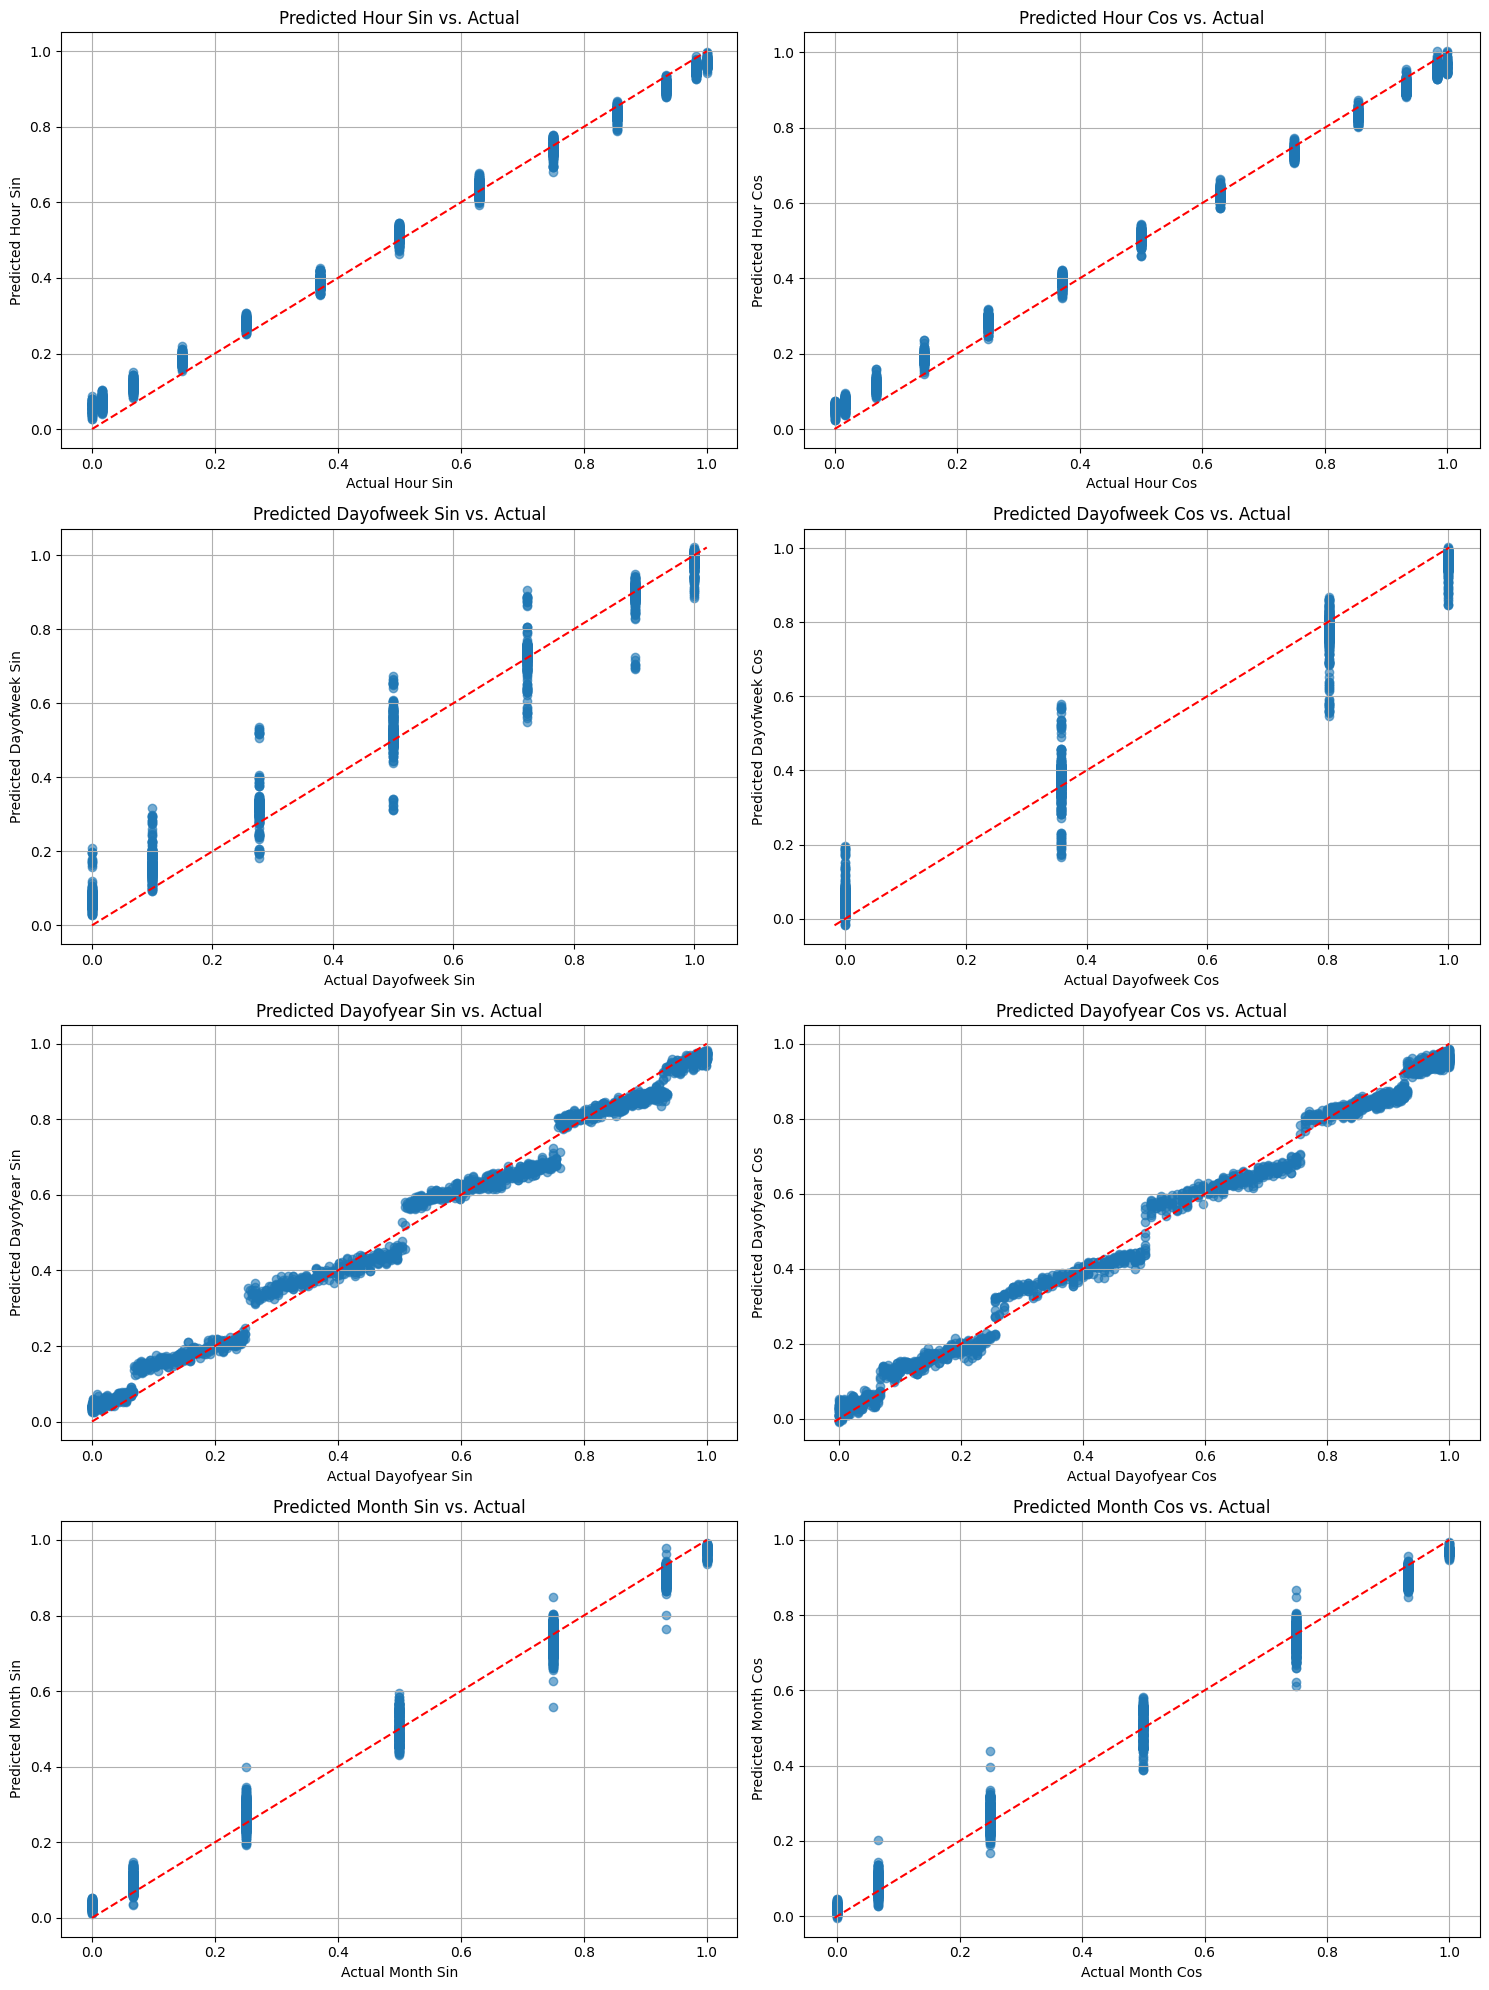

In [ ]:
import matplotlib.pyplot as plt

output_feature_names_cyclical = ['hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature_name in enumerate(output_feature_names_cyclical):
    actual_values = y_test_model2[:, i]
    predicted_values = y_pred_lstm_regression_cyclical[:, i]

    ax = axes[i]
    ax.scatter(actual_values, predicted_values, alpha=0.6)
    min_val = min(actual_values.min(), predicted_values.min())
    max_val = max(actual_values.max(), predicted_values.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--') # Perfect prediction line
    ax.set_xlabel(f'Actual {feature_name.replace("_", " ").title()}')
    ax.set_ylabel(f'Predicted {feature_name.replace("_", " ").title()}')
    ax.set_title(f'Predicted {feature_name.replace("_", " ").title()} vs. Actual')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_unscaled_cyclical = scaler_y.inverse_transform(y_pred_lstm_regression_cyclical)

def convert_cyclical_to_original(y_pred_unscaled, original_df):
    # Extract sine and cosine components for each feature
    hour_sin = y_pred_unscaled[:, 0]
    hour_cos = y_pred_unscaled[:, 1]
    dayofweek_sin = y_pred_unscaled[:, 2]
    dayofweek_cos = y_pred_unscaled[:, 3]
    dayofyear_sin = y_pred_unscaled[:, 4]
    dayofyear_cos = y_pred_unscaled[:, 5]
    month_sin = y_pred_unscaled[:, 6]
    month_cos = y_pred_unscaled[:, 7]

    # Convert back to original values
    pred_hour = (np.arctan2(hour_sin, hour_cos) / (2 * np.pi) * 24 + 24) % 24
    pred_dayofweek = (np.arctan2(dayofweek_sin, dayofweek_cos) / (2 * np.pi) * 7 + 7) % 7
    pred_dayofyear = (np.arctan2(dayofyear_sin, dayofyear_cos) / (2 * np.pi) * 365 + 365) % 365
    pred_month = (np.arctan2(month_sin, month_cos) / (2 * np.pi) * 12 + 12) % 12

    # Round to nearest integer for discrete values
    pred_hour = np.round(pred_hour).astype(int)
    pred_dayofweek = np.round(pred_dayofweek).astype(int)
    pred_dayofyear = np.round(pred_dayofyear).astype(int)
    pred_month = np.round(pred_month).astype(int)

    # Create a DataFrame for predicted original values
    predicted_original_values = pd.DataFrame({
        'predicted_hour': pred_hour,
        'predicted_dayofweek': pred_dayofweek,
        'predicted_dayofyear': pred_dayofyear,
        'predicted_month': pred_month
    })

    return predicted_original_values

# Get the actual unscaled cyclical features for comparison (from y_test_model2)
actual_unscaled_cyclical = scaler_y.inverse_transform(y_test_model2)

# Convert actual unscaled values for comparison
actual_original_values = convert_cyclical_to_original(actual_unscaled_cyclical, df_model2)

# Convert predicted unscaled values back to original units
predicted_original_values_df = convert_cyclical_to_original(y_pred_unscaled_cyclical, df_model2)

print("First 5 actual original time features:")
print(actual_original_values.head())
print("\nFirst 5 predicted original time features:")
print(predicted_original_values_df.head())


First 5 actual original time features:
   predicted_hour  predicted_dayofweek  predicted_dayofyear  predicted_month
0               9                    3                   30                1
1              16                    4                   80                3
2               0                    6                  313               11
3              19                    0                    6                1
4              15                    0                   20                1

First 5 predicted original time features:
   predicted_hour  predicted_dayofweek  predicted_dayofyear  predicted_month
0               9                    3                   24                1
1              16                    4                   77                3
2               0                    5                  317               11
3              19                    7                   12                1
4              15                    0                   18            

In [ ]:
import os

model_save_path = 'model_lstm_regression_cyclical.h5'

model_lstm_regression_cyclical.save(model_save_path)

print(f"LSTM model with cyclical features saved to: {os.path.abspath(model_save_path)}")

LSTM model with cyclical features saved to: /content/model_lstm_regression_cyclical.h5


In [ ]:
import joblib
import os

scaler_save_path = 'scaler_y.pkl'

joblib.dump(scaler_y, scaler_save_path)

print(f"Scaler saved to: {os.path.abspath(scaler_save_path)}")

Scaler saved to: /content/scaler_y.pkl


In [ ]:
import joblib
import os

scaler_save_path = 'scaler_X.pkl'

joblib.dump(scaler_X, scaler_save_path)

print(f"Scaler saved to: {os.path.abspath(scaler_save_path)}")

Scaler saved to: /content/scaler_X.pkl
